For this first trial we assume a naive model (LGM) defined as:
$$dx_t = \sigma_t dW_t^{\mathit{N}}$$

Let's define the Numeraire as:
$$N(t, x_t) = \frac{1}{B(0,t)}exp^{H_tx_t + \frac{1}{2}H_t^2\zeta_t}$$
where $H_t$ and $\zeta_t$ are known functions.

With this let's defined the fundamental equation for the pricing of a derivative under the model. The NPV (Net Present Value) is:
$$V_t = V(t, x_t)$$ 
and the deflated version 
$$\overline{V}_t = V(t, x_t) / N(t, x_t)$$

#### Montecarlo simulation

* Brownian path:
$$W_t \sim \mathcal{N}(0,t)$$
$$W[0] = X_0$$
$$W[t] = W[t - 1]  + \mathcal{Z} \cdot \Delta t^{\frac{1}{2}}$$
with 
$$\mathcal{Z} \sim \mathcal{N}(0,1)$$
* X:
$$X_{t + 1} = X_t + \sigma \cdot (W_{t + 1} - W_t)$$

In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from operator import itemgetter
from scipy import stats

class MCSimulation():
    def __init__(self, T, N, X0, sigma, model = 'LGM'):
        self._params = {
            'T':T,
            'N':N,
            'X0':X0,
            'sigma':sigma,
        }
        self._model = model
        
    def simulate(self, nsim = 1e3, show = False):
        T, N, X0, sigma = itemgetter('T', 'N', 'X0', 'sigma')(self._params)
        nsim = int(nsim)
        dt = T / N
        # Brownian simulation
        W, X = np.zeros([N,nsim]), np.zeros([N,nsim])
        # Starting point
        W[0] = X0
        X[0] = X0
        for i in range(1, N):
            W[i] = W[i - 1] + np.random.randn(nsim)
        # X simulation
        for i in range(1, N):
            X[i] = X[i - 1] + sigma * (W[i] - W[i - 1])
        if show:
            X = np.linspace(0, T, N)
        
        return X

In [78]:
T, N, X0, sigma = (1, 100, 0, 0.02)
mcsimulator = MCSimulation(T, N, X0, sigma)
nsims = int(1e2)
mc_paths = mcsimulator.simulate(nsims)
mc_paths_flatten = mc_paths.flatten('C')
deltaTs = np.linspace(0, T, N)
deltaTs = np.tile(deltaTs, nsims).reshape((N, nsims)).T.flatten(order = 'C')
df_x = pd.DataFrame(zip(
    deltaTs,
    mc_paths_flatten
), columns = ['dt', 'xt'])

#### Visualization

In [79]:
mc_paths_transpose = mc_paths.T
deltaTs = np.linspace(0, T, N)

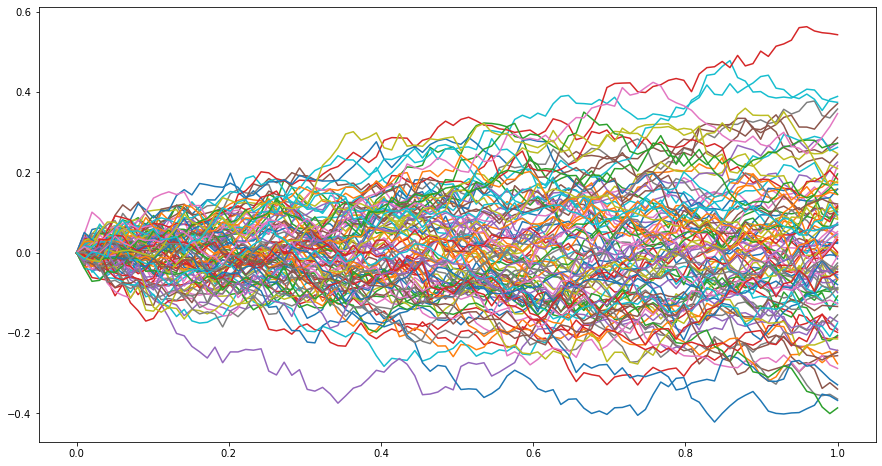

In [80]:
plt.figure(figsize = (15,8))
for vect in mc_paths_transpose:
    sns.lineplot(x = deltaTs, y = vect)
plt.show()

#### Seq2seq with feed forward neural networks

x